In [ ]:
#Сгруппируйте данные по полу и году и визуализируйте общую динамику
#рождаемости обоих полов
#● Найдите самые популярные имена за всю историю
#● Разбейте весь временной промежуток в данных на 10 частей и для каждой
#найдите самое популярное имя каждого пола. Для каждого найденного имени
#визуализируйте его динамику за все время
#● Для каждого года рассчитайте сколько имен покрывают 50% людей,
#визуализируйте (мы увидим разнообразие имен за каждый год)
#● Выберите 4 года из всего промежутка и отобразите для каждого года
#распределение по первой букве в имени, по последней букве в имени
#● Составьте список из нескольких известных людей (президенты, певцы, актеры,
#киногерои) и оцените их влияние на динамику имен, постройте наглядную
#визуализацию

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [297]:
frames = []
for f in os.listdir("./babynames"):
    if f.endswith(".txt"):
        year = int(f.split('.')[0][3:])
        csv = pd.read_csv("./babynames/" + f, sep=',', names = ["Name", "Sex", "Count"])
        csv['Year'] = [year]*csv.shape[0]
        frames.append(csv)

In [298]:
names.index = pd.RangeIndex(len(names.index))

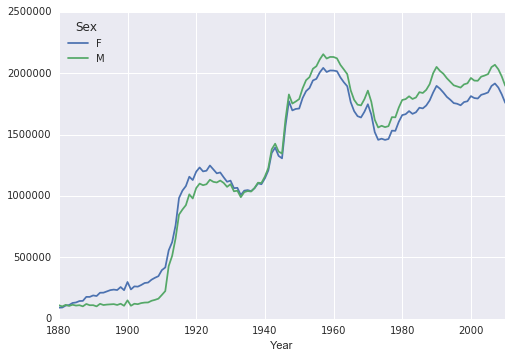

In [266]:
#Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов
names.groupby(['Year', 'Sex']).sum()['Count'].unstack().plot()

In [98]:
#Найдите самые популярные имена за всю историю
nameGroup = names[['Name', 'Count', 'Sex']].groupby(['Sex', 'Name']).sum()

In [117]:
nameGroup.loc['F', nameGroup.loc['F']['Count'].idxmax()]

Count    4103935
Name: (F, Mary), dtype: int64

In [159]:
nameGroup.loc['M', nameGroup.loc['M']['Count'].idxmax()]

Count    5049727
Name: (M, James), dtype: int64

In [119]:
#Разбейте весь временной промежуток в данных на 10 частей и для каждой
#найдите самое популярное имя каждого пола. Для каждого найденного имени
#визуализируйте его динамику за все время

In [299]:
parts = np.array_split(list(set(names['Year'])), 10)

In [300]:
plt.rcParams["figure.figsize"] = (25,25)

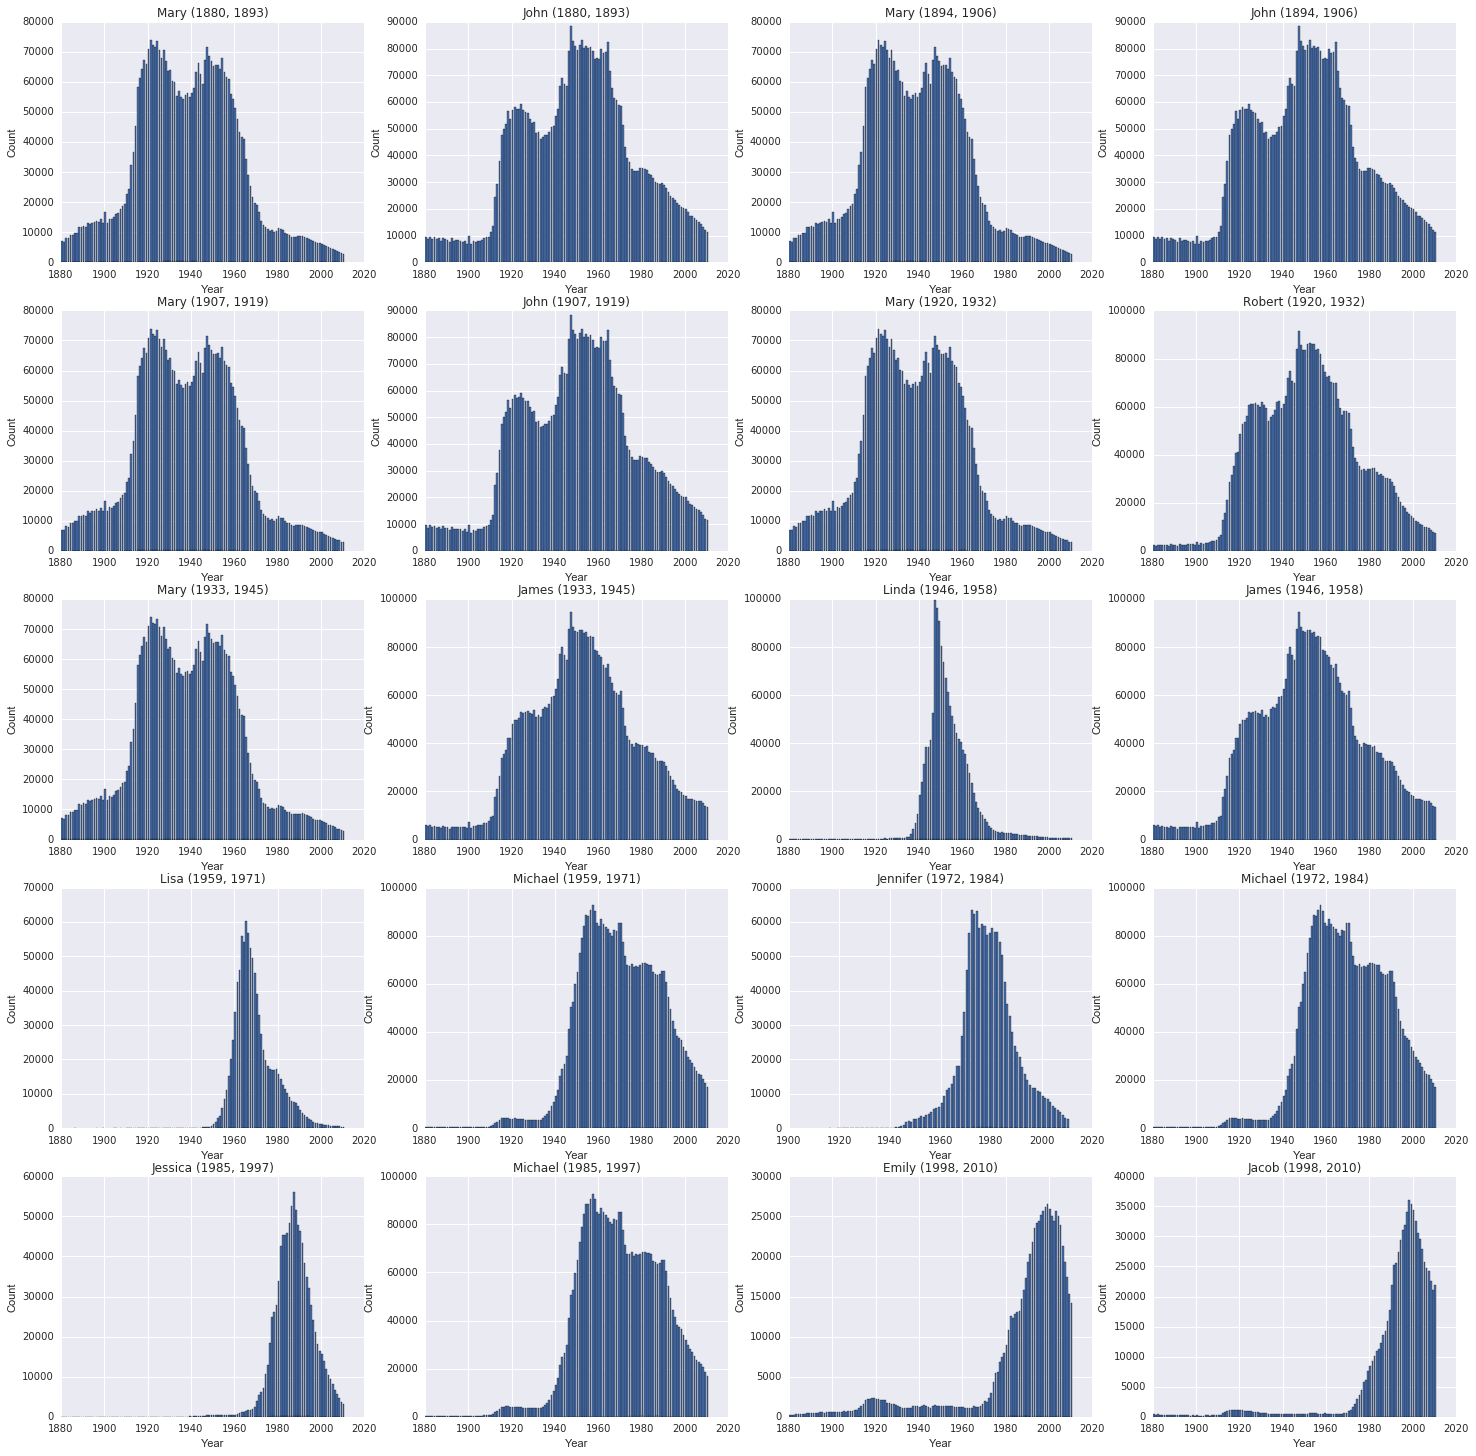

In [302]:
for i in range(10):
    df = names[names['Year'].isin(parts[i])]
    nameGroup = df[['Name', 'Count', 'Sex']].groupby(['Sex', 'Name']).sum()
    fName = nameGroup.loc['F', nameGroup.loc['F']['Count'].idxmax()].name[1]
    mName = nameGroup.loc['M', nameGroup.loc['M']['Count'].idxmax()].name[1]
    
    plt.subplot(5, 4, i*2 + 1)
    plt.bar(names[names['Name'] == fName]['Year'], names[names['Name'] == fName]['Count'])
    plt.title(fName + " (" + str(min(parts[i])) + ", " + str(max(parts[i])) + ")")
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.subplot(5, 4, (i + 1)*2)
    plt.bar(names[names['Name'] == mName]['Year'], names[names['Name'] == mName]['Count'])
    plt.title(mName + " (" + str(min(parts[i])) + ", " + str(max(parts[i])) + ")")
    plt.xlabel('Year')
    plt.ylabel('Count')

In [ ]:
#Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)

In [271]:
years = list(set(names['Year']))

In [272]:
counts = []
for year in years:
    df = names[names['Year'] == year]
    cum_sum = df.sort_values(by=['Count'], ascending=False).Count.cumsum()
    cum_perc = 100*cum_sum/df.Count.sum()
    
    for i, perc in enumerate(cum_perc):
        if(perc >=50):
            counts.append(i)
            break;

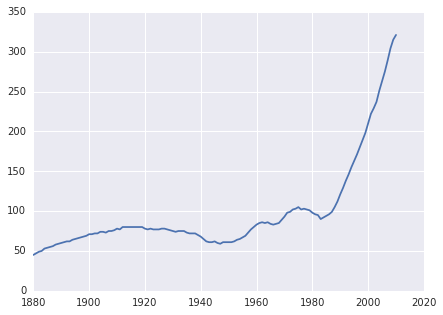

In [273]:
plt.rcParams["figure.figsize"] = (7, 5)
plt.plot(years, counts)

In [228]:
#Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени

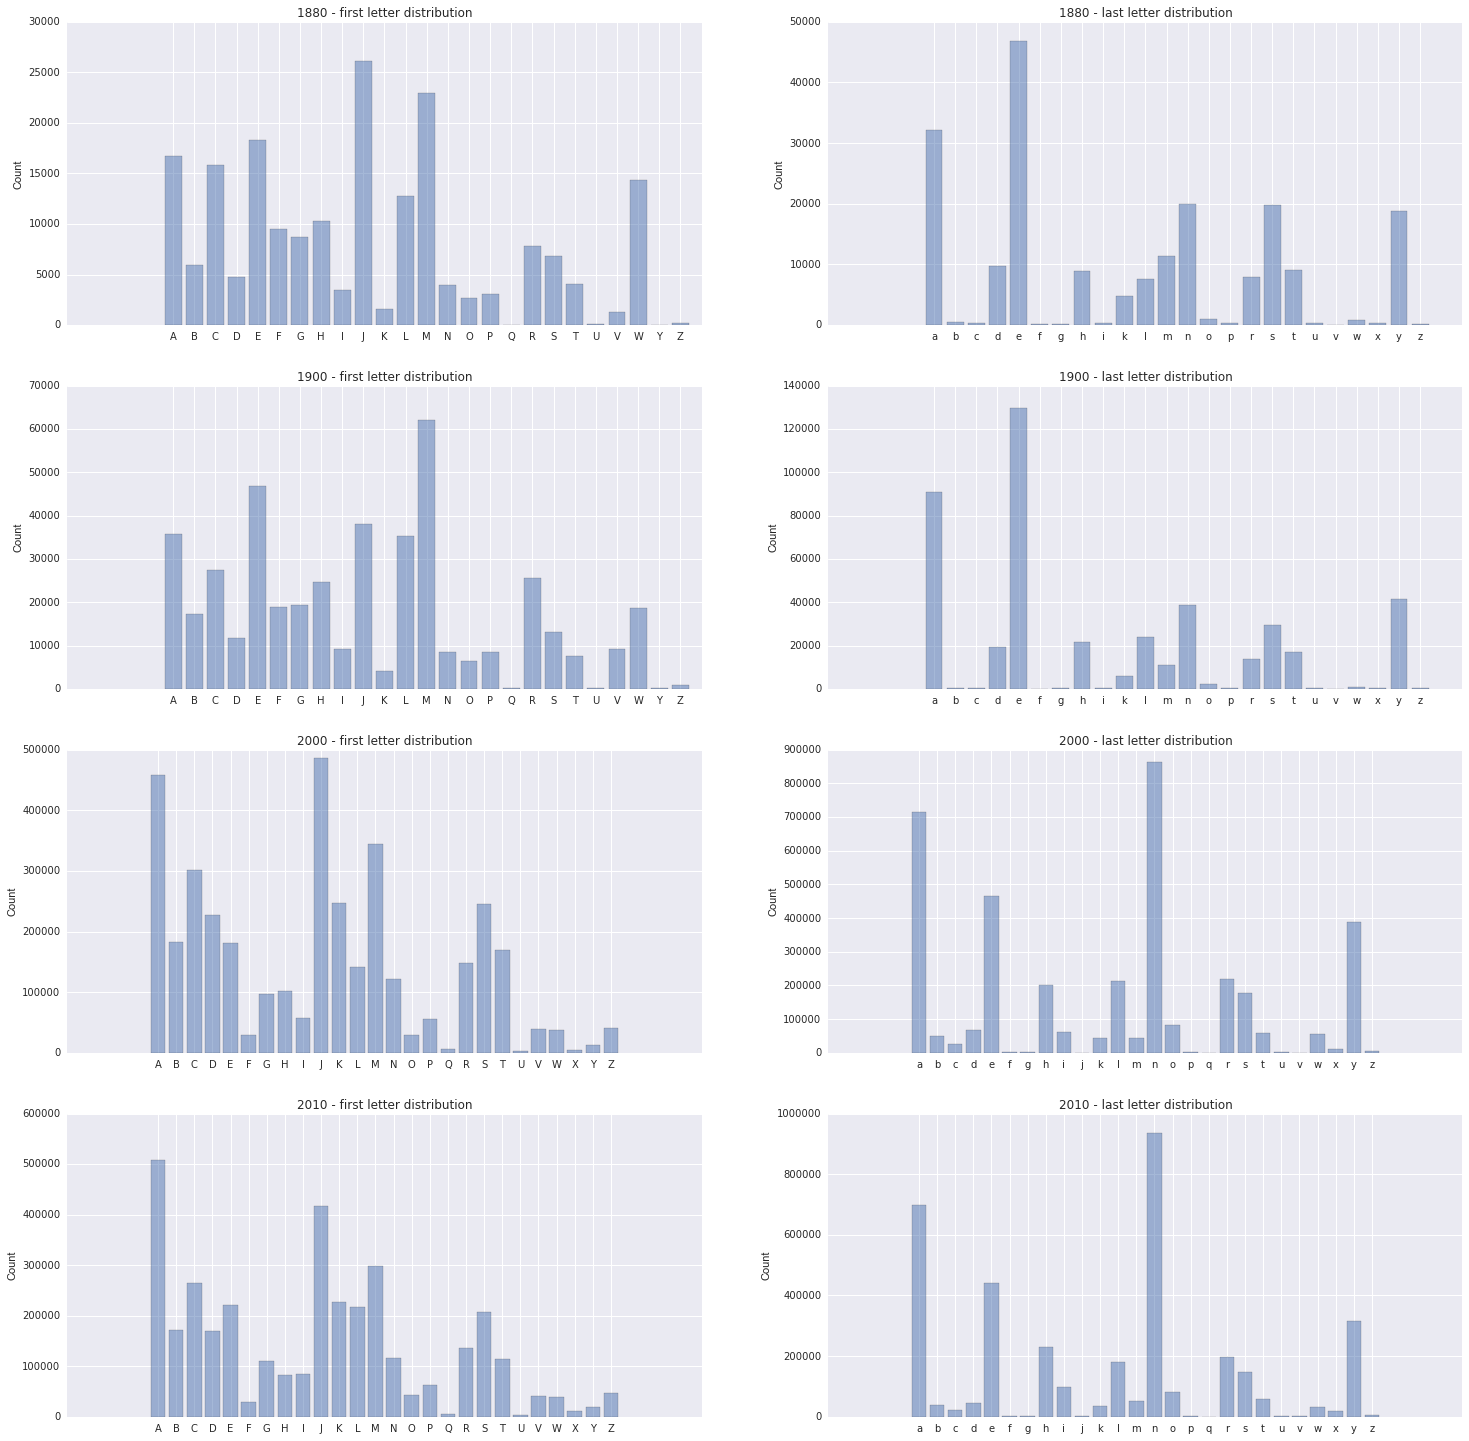

In [274]:
plt.rcParams["figure.figsize"] = (25,25)
for i, year in enumerate([1880, 1900, 2000, 2010]):
    df = names[names['Year'] == year]
    df['first_letter'] = [name[0] for name in df['Name']]
    df['last_letter'] = [name[-1] for name in df['Name']]
    
    plt.subplot(4, 2, i*2 + 1)
    letters = df.groupby(['first_letter']).sum()['Count'].index
    y_pos = np.arange(len(letters))
    counts = df.groupby(['first_letter']).sum()['Count']
    plt.bar(y_pos, counts, align='center', alpha=0.5)
    plt.xticks(y_pos, letters)
    plt.ylabel('Count')
    plt.title(str(year) + ' - first letter distribution')
    
    plt.subplot(4, 2, (i + 1)*2)
    letters = df.groupby(['last_letter']).sum()['Count'].index
    y_pos = np.arange(len(letters))
    counts = df.groupby(['last_letter']).sum()['Count']
    plt.bar(y_pos, counts, align='center', alpha=0.5)
    plt.xticks(y_pos, letters)
    plt.ylabel('Count')
    plt.title(str(year) + ' - last letter distribution')

In [ ]:
#Составьте список из нескольких известных людей (президенты, певцы, актеры,киногерои) 
#оцените их влияние на динамику имен, постройте наглядную визуализацию

<Container object of 214 artists>

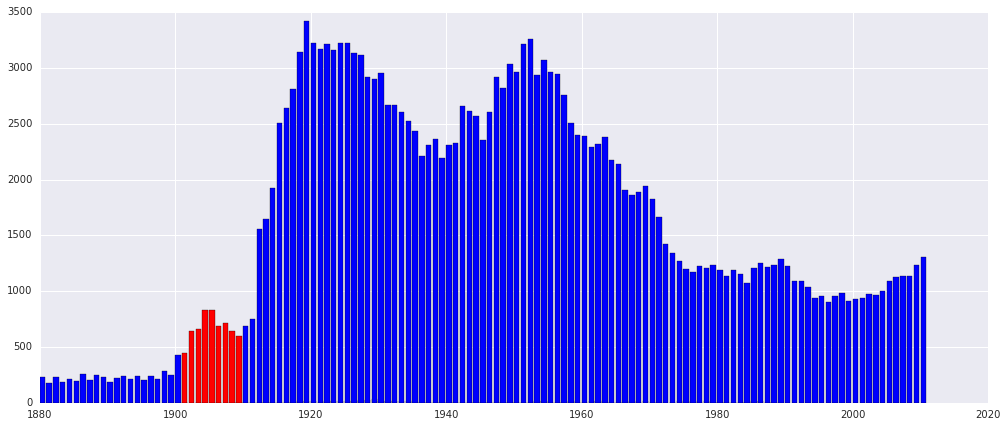

In [317]:
#Теодор Рузвельт, президент с 1901 по 1909 года
colors = ['blue' if year not in range(1901, 1910) else 'red' for year in names[(names['Name']=='Theodore')]['Year']]
plt.rcParams["figure.figsize"] = (17,7)
plt.bar(names[(names['Name']=='Theodore')]['Year'], names[(names['Name']=='Theodore')]['Count'], color=colors)

<Container object of 143 artists>

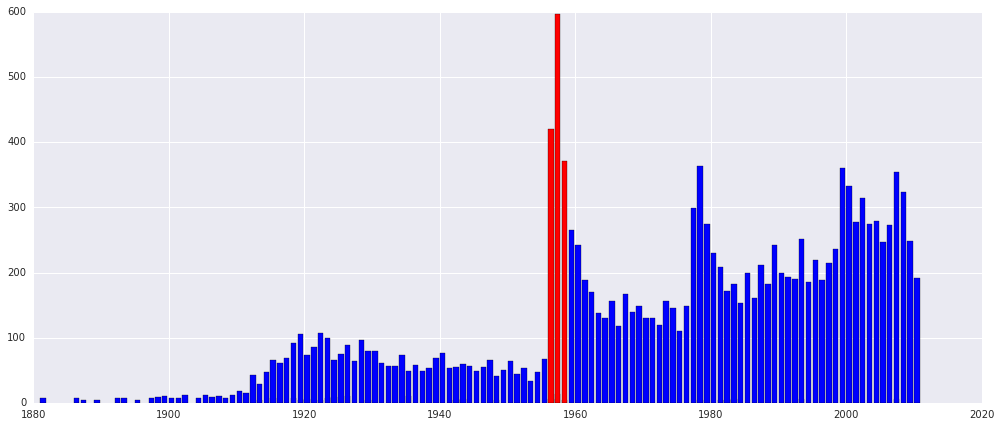

In [319]:
#Элвис Пресли, пик популярности 56-58 года
colors = ['blue' if year not in range(1956, 1959) else 'red' for year in names[(names['Name']=='Elvis')]['Year']]
plt.bar(names[(names['Name']=='Elvis')]['Year'], names[(names['Name']=='Elvis')]['Count'], color=colors)